In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

## 3.2: 位置埋込みを可視化してどのような特徴量になっているかを確認せよ。

[[0.46683921 0.69602092 0.69696675 0.03511422 0.64600764]
 [0.96785917 0.43815733 0.29251027 0.53075995 0.86768185]
 [0.988926   0.77131411 0.86578659 0.52066671 0.71061245]
 [0.42414831 0.03648751 0.52103077 0.81697294 0.96296137]
 [0.00366749 0.03981413 0.24687632 0.32498421 0.78857166]]


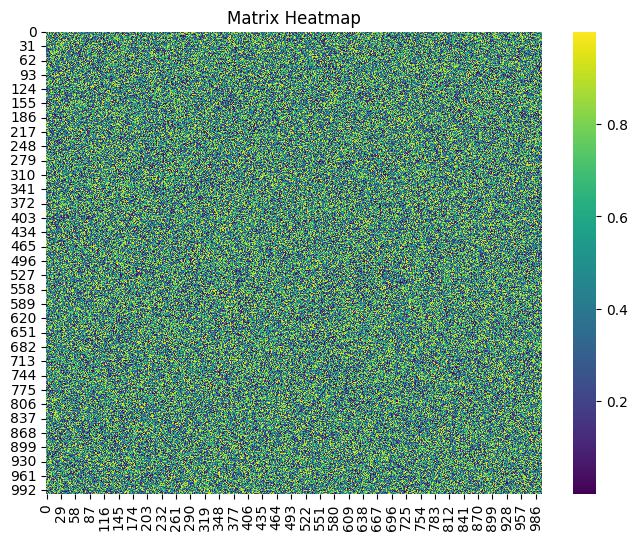

In [24]:
# 行列の可視化の例

A = np.random.rand(1000, 1000)

# 先頭の数行・数列だけを表示
print(A[:5, :5])

plt.figure(figsize=(8, 6))
sns.heatmap(A, cmap='viridis')  # cmap は色のスタイル
plt.title("Matrix Heatmap")
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


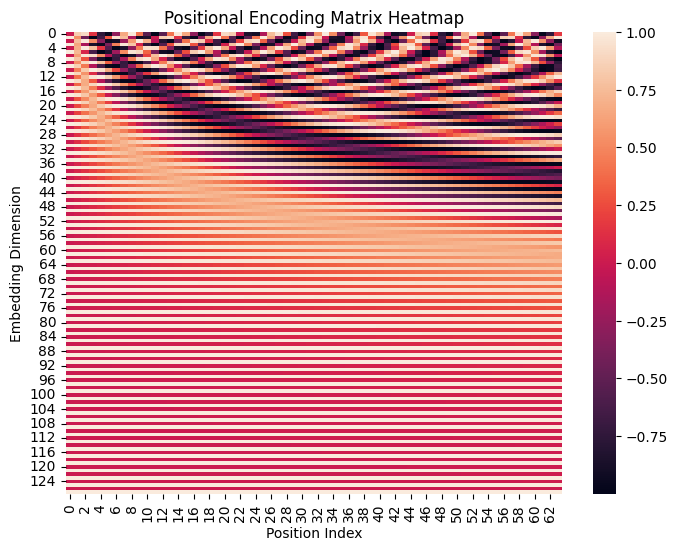

In [25]:
MODEL_DIM = 128
MAX_POSITION = 64
PE = np.zeros((MODEL_DIM, MAX_POSITION))

print(PE)

for p in range(MAX_POSITION):
    for i in range(MODEL_DIM // 2):
        PE[2*i, p] = np.sin(p / (10000 ** ((2 * i) / MODEL_DIM)))
        PE[2*i + 1, p] = np.cos(p / (10000 ** ((2 * i) / MODEL_DIM)))

plt.figure(figsize=(8, 6))
sns.heatmap(PE)
plt.ylabel('Embedding Dimension')
plt.xlabel('Position Index')
plt.title("Positional Encoding Matrix Heatmap")
plt.show()

## 3.3: 上記のトークン埋め込みのノルムが位置埋込みのノルムと同程度になることを数値的に確かめよ。

トークン埋め込みとしてはノルムが1になるように正規化されたものを想定する。

In [41]:
token_emb = np.random.randn(MODEL_DIM)
token_emb = token_emb / np.linalg.norm(token_emb) # 単位ベクトルはノルムで割れば得られる

print(f"トークン埋め込みのノルム: {np.linalg.norm(token_emb)}")
print(f"√d_modelを掛けたトークン埋め込みのノルムの2乗: {np.dot(math.sqrt(MODEL_DIM) * token_emb, math.sqrt(MODEL_DIM) * token_emb)}")



トークン埋め込みのノルム: 0.9999999999999999
√d_modelを掛けたトークン埋め込みのノルムの2乗: 128.0


In [42]:
PE_0 = PE[:,0]

print(f"位置埋込みのノルム: {np.linalg.norm(PE_0)}")
print(f"位置埋込みのノルムの2乗: {np.dot(PE_0, PE_0)}")

位置埋込みのノルム: 8.0
位置埋込みのノルムの2乗: 64.0
